# **Sentiment Analysis using NLP and RNN Techniques**

---



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np 
import nltk
import matplotlib.pyplot as plt
import re

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Datasets/Tweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.drop(['negativereason','negativereason_confidence','airline_sentiment_gold',\
         'negativereason_gold','tweet_coord','tweet_location','user_timezone'],axis='columns', inplace=True)

In [ ]:
df.shape

(14640, 8)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [ ]:
tweet=df.copy()

In [ ]:
df.airline_sentiment=df.airline_sentiment.map({'neutral' : 1, 'positive':1,'negative':0})
df.airline_sentiment[0:10]

0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: airline_sentiment, dtype: int64

Text(0.5, 0, 'Sentiment')

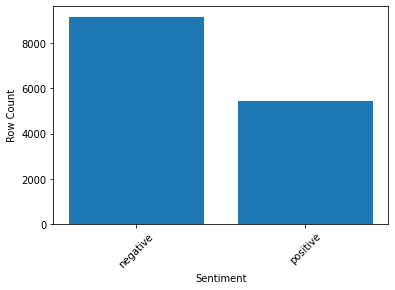

In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

count=df['airline_sentiment'].value_counts()
Index = [1,2]
plt.bar(Index,count)
plt.xticks(Index,['negative','positive'],rotation=45)
plt.ylabel('Row Count')
plt.xlabel('Sentiment')

In [ ]:
df["text"]

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z0-9]', ' ', df["text"][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
len(corpus)

14640

In [ ]:
nltk.download('punkt')
wt = [nltk.word_tokenize(sentence) for sentence in corpus]
wt

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import word2vec

num_features = 400    # Word vector dimensionality                      
min_word_count = 3   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

### Word2vec using CBOW

In [ ]:
#Using CBOW
model1 = word2vec.Word2Vec(wt, workers=num_workers, size=num_features,\
                           min_count = min_word_count, window = context, \
                           sg=0, sample = downsampling)

In [ ]:
model1.wv.vocab

{'virginamerica': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e4d0>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e3d0>,
 'plus': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e190>,
 'added': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e350>,
 'commercials': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e490>,
 'experience': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e450>,
 'today': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e390>,
 'must': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e2d0>,
 'mean': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e150>,
 'need': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e0d0>,
 'take': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e090>,
 'another': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e1d0>,
 'trip': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e110>,
 'really': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e410>,
 'aggressive': <gensim.models.keyedvectors.Vocab at 0x7f5009d930d0>,
 'entertainment': <g

In [ ]:
vector1 = model1.wv["inconvenience"]  
len(vector1)

400

In [ ]:
model1.most_similar('inconvenience',topn =15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wifi', 0.9999246597290039),
 ('many', 0.9999239444732666),
 ('club', 0.9999225735664368),
 ('ask', 0.999921441078186),
 ('sense', 0.9999125003814697),
 ('case', 0.9999110698699951),
 ('clothes', 0.9999085664749146),
 ('2015', 0.9999064207077026),
 ('big', 0.9999056458473206),
 ('anywhere', 0.999905526638031),
 ('needs', 0.9999048113822937),
 ('mail', 0.9999028444290161),
 ('say', 0.9999017715454102),
 ('internet', 0.9999011158943176),
 ('show', 0.9998999238014221)]

In [ ]:
##Training the model
model1.train(sentences=corpus, total_examples=len(corpus), epochs=model1.iter)
print(model1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


Word2Vec(vocab=4453, size=400, alpha=0.025)


## Word2vec using Skip gram

In [ ]:
#Using Skipgram
model2 = word2vec.Word2Vec(wt, workers=num_workers, size=num_features,\
                           min_count = min_word_count, window = context, \
                           sg=1, sample = downsampling)

In [ ]:
model2.most_similar('inconvenience',topn =15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('reliable', 0.9963783621788025),
 ('hoped', 0.9963176250457764),
 ('confusing', 0.9960012435913086),
 ('refundable', 0.9956945180892944),
 ('harbor', 0.9956585764884949),
 ('exception', 0.9955346584320068),
 ('proving', 0.9950238466262817),
 ('expenses', 0.9950082302093506),
 ('sincere', 0.9949765205383301),
 ('notimpressed', 0.9949107766151428),
 ('nonprofit', 0.9947516918182373),
 ('manch', 0.9947259426116943),
 ('opinion', 0.9946929216384888),
 ('getittogether', 0.9946870803833008),
 ('rectify', 0.9946756362915039)]

In [ ]:
##Training the model
model2.train(sentences=corpus, total_examples=len(corpus), epochs=model2.iter)
print(model2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


Word2Vec(vocab=4453, size=400, alpha=0.025)


In [ ]:
len(model2.wv.vocab)

4453

## Analysis of word2vec Trained models

In [ ]:
important_words1 = []
count = 0
for word in model1.wv.vocab:
    if count<500:
        important_words1.append(word)
        count += 1
    else:
        break
important_words1 = dict((k, model1.wv.vocab[k]) for k in important_words1 if k in model1.wv.vocab)
important_words1

{'000': <gensim.models.keyedvectors.Vocab at 0x7f5009d9f190>,
 '10': <gensim.models.keyedvectors.Vocab at 0x7f5009d93d10>,
 '100': <gensim.models.keyedvectors.Vocab at 0x7f5009d9f6d0>,
 '10pm': <gensim.models.keyedvectors.Vocab at 0x7f5009d9b510>,
 '11': <gensim.models.keyedvectors.Vocab at 0x7f5009d9b750>,
 '1st': <gensim.models.keyedvectors.Vocab at 0x7f5009d95110>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f5009e0ee50>,
 '2014': <gensim.models.keyedvectors.Vocab at 0x7f5009d9b390>,
 '24': <gensim.models.keyedvectors.Vocab at 0x7f5009d93d50>,
 '24th': <gensim.models.keyedvectors.Vocab at 0x7f5009d99e90>,
 '27': <gensim.models.keyedvectors.Vocab at 0x7f5009d994d0>,
 '2a': <gensim.models.keyedvectors.Vocab at 0x7f5009e33f50>,
 '2nd': <gensim.models.keyedvectors.Vocab at 0x7f5009d93fd0>,
 '3': <gensim.models.keyedvectors.Vocab at 0x7f5009d93dd0>,
 '30': <gensim.models.keyedvectors.Vocab at 0x7f5009d93410>,
 '35': <gensim.models.keyedvectors.Vocab at 0x7f5009d9f150>,
 '4': <gensim.mo

In [ ]:
important_words2 = []
count = 0
for word in model2.wv.vocab:
    if count<500:
        important_words2.append(word)
        count += 1
    else:
        break
important_words2 = dict((k, model2.wv.vocab[k]) for k in important_words2 if k in model2.wv.vocab)
important_words2

{'000': <gensim.models.keyedvectors.Vocab at 0x7f4fff423410>,
 '10': <gensim.models.keyedvectors.Vocab at 0x7f4fff41b350>,
 '100': <gensim.models.keyedvectors.Vocab at 0x7f4fff423950>,
 '10pm': <gensim.models.keyedvectors.Vocab at 0x7f5009ca9f10>,
 '11': <gensim.models.keyedvectors.Vocab at 0x7f5000475810>,
 '1st': <gensim.models.keyedvectors.Vocab at 0x7f4fff41b710>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f4fff41fb10>,
 '2014': <gensim.models.keyedvectors.Vocab at 0x7f5009e043d0>,
 '24': <gensim.models.keyedvectors.Vocab at 0x7f4fff41b390>,
 '24th': <gensim.models.keyedvectors.Vocab at 0x7f5009e0e050>,
 '27': <gensim.models.keyedvectors.Vocab at 0x7f500044ea90>,
 '2a': <gensim.models.keyedvectors.Vocab at 0x7f4fff40f710>,
 '2nd': <gensim.models.keyedvectors.Vocab at 0x7f4fff41b610>,
 '3': <gensim.models.keyedvectors.Vocab at 0x7f4fff41b410>,
 '30': <gensim.models.keyedvectors.Vocab at 0x7f4fff41aa10>,
 '35': <gensim.models.keyedvectors.Vocab at 0x7f4fff4233d0>,
 '4': <gensim.mo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


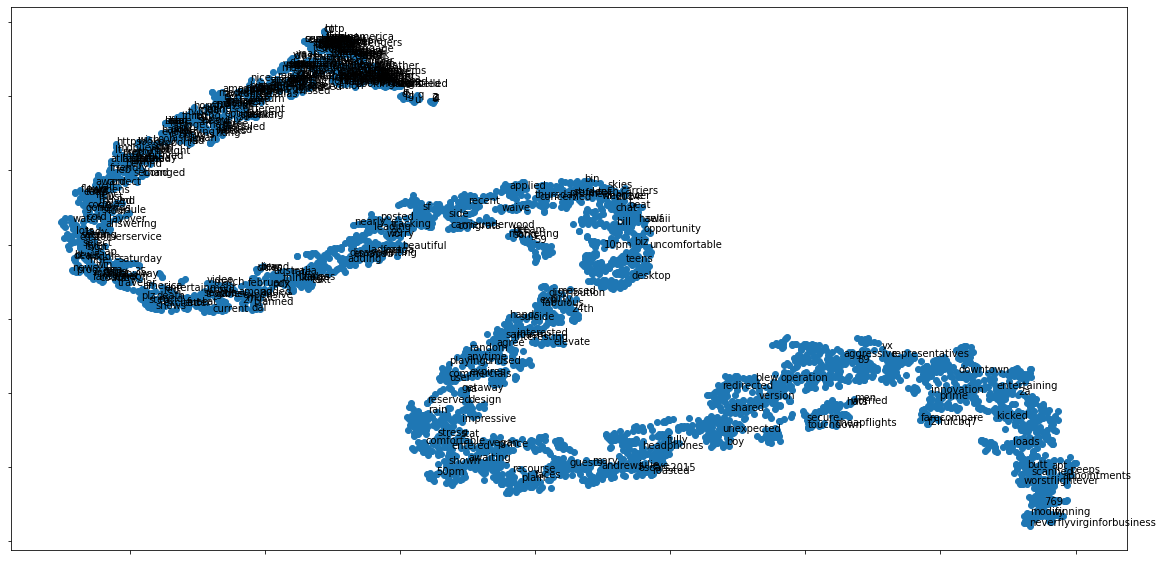

In [ ]:
from sklearn.manifold import TSNE

X = model1[model1.wv.vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model1 = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model1.fit_transform(X)

#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(important_words1)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


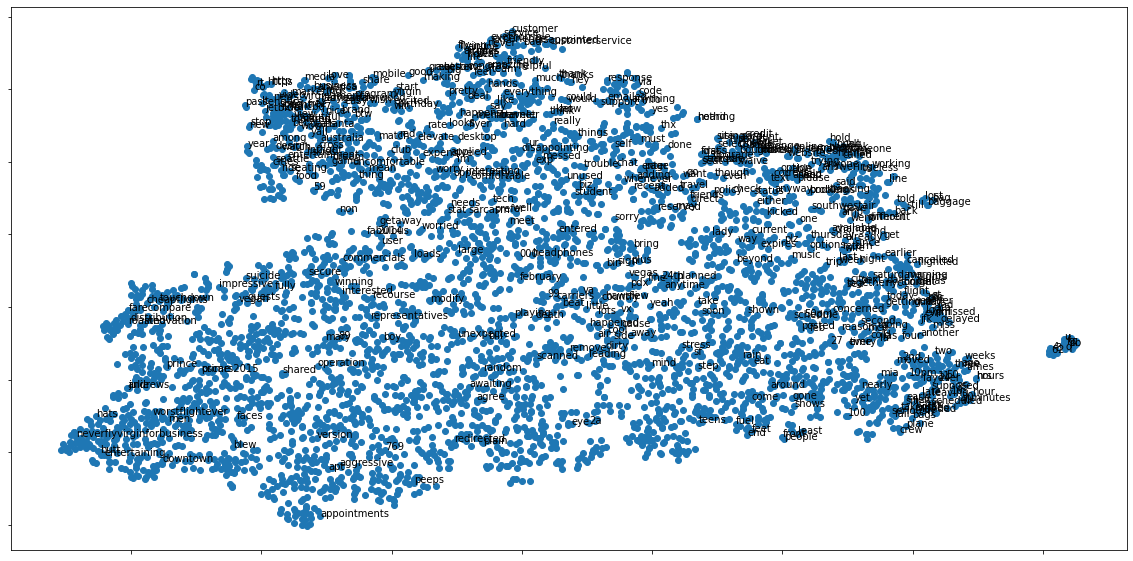

In [ ]:

X = model2[model2.wv.vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model2 = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model2.fit_transform(X)

#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(important_words2)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

#LSTM and Bidirectional LSTM

In [ ]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [ ]:
tweet.shape

(14640, 8)

In [ ]:
##Independent Features
X=tweet.drop('airline_sentiment',axis=1)
X.head()

,tweet_id,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [ ]:
Y=tweet.airline_sentiment.map({'neutral' : 1, 'positive':1,'negative':0})
Y[0:10]

0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: airline_sentiment, dtype: int64

In [ ]:
X.shape, Y.shape

((14640, 7), (14640,))

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
##Vocabulary size
voc_size=5000

### One Hot Encoding

In [ ]:
sentences=X.copy()

In [ ]:
sentences.head()

,tweet_id,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Text Preprocessing
corpus = []
for i in range(0, len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['virginamerica dhepburn said',
 'virginamerica plus added commercials experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seats playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hats parody https co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teens',
 'virginamerica lt pretty graphics much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive skies u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule st

In [ ]:
onehot_rep=[one_hot(words,voc_size)for words in corpus] 
onehot_rep

[[3657, 1859, 1209],
 [3657, 4431, 1017, 43, 906, 1767],
 [3657, 4606, 441, 3307, 3666, 4303, 1685, 3753],
 [3657, 3482, 3413, 2026, 2825, 1074, 1341, 3556, 2217, 1560, 301],
 [3657, 3482, 484, 4612, 560],
 [3657, 1622, 4277, 1285, 1198, 3670, 3063, 3482, 4612, 560, 979, 771],
 [3657, 2892, 2146, 2391, 2956, 4877, 2948, 3141, 4301, 4058, 3640],
 [3657, 3482, 687, 4647, 1793, 2739, 850, 4794, 2278, 4931, 4612, 314, 3632],
 [3657, 2730],
 [3657, 1885, 2056, 3582, 2856, 101],
 [3657, 3843, 1905, 4474, 4099, 3165, 194, 1014, 4593],
 [3657, 3093, 1614, 3427, 380, 221, 3794, 3364],
 [3657,
  758,
  835,
  1243,
  1106,
  3059,
  3753,
  922,
  2217,
  3828,
  3217,
  4222,
  3753,
  3912,
  3200],
 [3657,
  2593,
  979,
  997,
  2469,
  2466,
  1488,
  4303,
  4619,
  3640,
  4105,
  713,
  4612,
  3890],
 [3657, 2845],
 [3657, 540, 3688, 810, 3770, 2478],
 [3657,
  74,
  849,
  282,
  2848,
  1198,
  3933,
  263,
  4964,
  2163,
  758,
  4553,
  3545,
  4644,
  1621],
 [3657,
  3168,
  3137

In [ ]:
sent_length=30
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
embedded_docs

array([[   0,    0,    0, ..., 3657, 1859, 1209],
       [   0,    0,    0, ...,   43,  906, 1767],
       [   0,    0,    0, ..., 4303, 1685, 3753],
       ...,
       [   0,    0,    0, ..., 1881, 4841, 4890],
       [   0,    0,    0, ..., 3392,   22, 3672],
       [   0,    0,    0, ..., 2642, 4873, 1198]], dtype=int32)

In [ ]:
embedded_docs.size

439200

### Model Creation

In [ ]:
## Creating LSTM model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(LSTM(100))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Creating BiLSTM model
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(Bidirectional(LSTM(100)))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


###Model Training and Performance

In [ ]:
len(embedded_docs),Y.shape

(14640, (14640,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(Y)

In [ ]:
X_final.shape,y_final.shape

((14640, 30), (14640,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
##Training of LSTM Model
stat1=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
154/154 [==============================] - 9s 46ms/step - loss: 0.5118 - accuracy: 0.7438 - val_loss: 0.4067 - val_accuracy: 0.8069
Epoch 2/10
154/154 [==============================] - 7s 43ms/step - loss: 0.3411 - accuracy: 0.8513 - val_loss: 0.4153 - val_accuracy: 0.8108
Epoch 3/10
154/154 [==============================] - 7s 42ms/step - loss: 0.2816 - accuracy: 0.8802 - val_loss: 0.4470 - val_accuracy: 0.8148
Epoch 4/10
154/154 [==============================] - 7s 43ms/step - loss: 0.2474 - accuracy: 0.8954 - val_loss: 0.4621 - val_accuracy: 0.8026
Epoch 5/10
154/154 [==============================] - 7s 43ms/step - loss: 0.2050 - accuracy: 0.9189 - val_loss: 0.5240 - val_accuracy: 0.7978
Epoch 6/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1685 - accuracy: 0.9341 - val_loss: 0.6055 - val_accuracy: 0.7908
Epoch 7/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1383 - accuracy: 0.9488 - val_loss: 0.8251 - val_accuracy: 0.7856

In [ ]:
##Training of BiLSTM Model
stat2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
154/154 [==============================] - 14s 70ms/step - loss: 0.5232 - accuracy: 0.7360 - val_loss: 0.4143 - val_accuracy: 0.8028
Epoch 2/10
154/154 [==============================] - 10s 65ms/step - loss: 0.3514 - accuracy: 0.8468 - val_loss: 0.4072 - val_accuracy: 0.8218
Epoch 3/10
154/154 [==============================] - 10s 66ms/step - loss: 0.2921 - accuracy: 0.8758 - val_loss: 0.4279 - val_accuracy: 0.8075
Epoch 4/10
154/154 [==============================] - 10s 67ms/step - loss: 0.2494 - accuracy: 0.8956 - val_loss: 0.4954 - val_accuracy: 0.8069
Epoch 5/10
154/154 [==============================] - 10s 65ms/step - loss: 0.2156 - accuracy: 0.9129 - val_loss: 0.5394 - val_accuracy: 0.7943
Epoch 6/10
154/154 [==============================] - 10s 66ms/step - loss: 0.2138 - accuracy: 0.9138 - val_loss: 0.6169 - val_accuracy: 0.7943
Epoch 7/10
154/154 [==============================] - 10s 67ms/step - loss: 0.1639 - accuracy: 0.9376 - val_loss: 0.6466 - val_accuracy:

In [ ]:
#Accuracy of LSTM Model
prediction1 = model1.predict_classes(X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

mat=confusion_matrix(y_test,prediction1)
print(mat)
acc=accuracy_score(y_test,prediction1)
print(acc)
report=classification_report(y_test,prediction1)
print(report)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[2495  590]
 [ 503 1244]]
0.7737996688741722
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3085
           1       0.68      0.71      0.69      1747

    accuracy                           0.77      4832
   macro avg       0.76      0.76      0.76      4832
weighted avg       0.78      0.77      0.77      4832



In [ ]:
#Accuracy of BiLSTM Model
prediction2 = model2.predict_classes(X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

mat2=confusion_matrix(y_test,prediction2)
print(mat2)
acc2=accuracy_score(y_test,prediction2)
print(acc2)
report2=classification_report(y_test,prediction2)
print(report2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[2575  510]
 [ 545 1202]]
0.7816639072847682
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3085
           1       0.70      0.69      0.69      1747

    accuracy                           0.78      4832
   macro avg       0.76      0.76      0.76      4832
weighted avg       0.78      0.78      0.78      4832



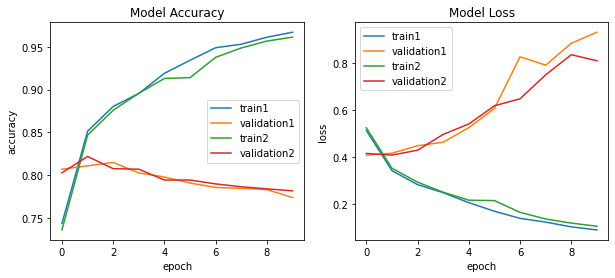

In [ ]:
#Plotting Accuracy and Loss for LSTM, BiLSTM

def plot_training_hist(stat1, stat2):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(stat1.history['accuracy'])
    ax[0].plot(stat1.history['val_accuracy'])
    ax[0].plot(stat2.history['accuracy'])
    ax[0].plot(stat2.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train1', 'validation1', 'train2', 'validation2'], loc='best')
    # second plot
    ax[1].plot(stat1.history['loss'])
    ax[1].plot(stat1.history['val_loss'])
    ax[1].plot(stat2.history['loss'])
    ax[1].plot(stat2.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train1', 'validation1', 'train2', 'validation2'], loc='best')
    
plot_training_hist(stat1, stat2)

For the given dataset, LSTM and BiLSTM seems to work in a similar way

##Activation function analysis in hidden layers

In [ ]:
## Model for sigmoid activation function in each layer
embedding_vector_features=40
model3=Sequential()
#Input Layer
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#First Hidden Layer
model3.add(LSTM(100))
#Second Hidden Layer
model3.add(Dense(100,activation='sigmoid'))
#Output Layer
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Model for tanh activation function in hidden layer
embedding_vector_features=40
model4=Sequential()
#Input Layer
model4.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#First Hidden Layer
model4.add(LSTM(100))
#Second Hidden Layer
model4.add(Dense(100,activation='tanh'))
#Output Layer
model4.add(Dense(1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model4.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Model for relu activation function in hidden layer
embedding_vector_features=40
model5=Sequential()
#Input Layer
model5.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#First Hidden Layer
model5.add(LSTM(100))
#Second Hidden Layer
model5.add(Dense(100,activation='relu'))
#Output Layer
model5.add(Dense(1,activation='sigmoid'))
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model5.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Model for LeakyRelu activation function in hidden layer
embedding_vector_features=40
model6=Sequential()
#Input Layer
model6.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#First Hidden Layer
model6.add(LSTM(100))
#Second Hidden Layer
model6.add(Dense(100,activation='LeakyReLU'))
#Output Layer
model6.add(Dense(1,activation='sigmoid'))
model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model6.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
stat3=model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
154/154 [==============================] - 9s 45ms/step - loss: 0.5152 - accuracy: 0.7355 - val_loss: 0.4092 - val_accuracy: 0.8111
Epoch 2/10
154/154 [==============================] - 7s 43ms/step - loss: 0.3431 - accuracy: 0.8489 - val_loss: 0.4242 - val_accuracy: 0.8160
Epoch 3/10
154/154 [==============================] - 6s 42ms/step - loss: 0.2865 - accuracy: 0.8781 - val_loss: 0.4399 - val_accuracy: 0.8113
Epoch 4/10
154/154 [==============================] - 7s 42ms/step - loss: 0.2439 - accuracy: 0.8976 - val_loss: 0.4709 - val_accuracy: 0.8028
Epoch 5/10
154/154 [==============================] - 7s 42ms/step - loss: 0.2047 - accuracy: 0.9198 - val_loss: 0.5693 - val_accuracy: 0.7999
Epoch 6/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1686 - accuracy: 0.9363 - val_loss: 0.5849 - val_accuracy: 0.7964
Epoch 7/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1378 - accuracy: 0.9511 - val_loss: 0.6571 - val_accuracy: 0.7885

In [ ]:
stat4=model4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
154/154 [==============================] - 9s 47ms/step - loss: 0.4932 - accuracy: 0.7539 - val_loss: 0.4048 - val_accuracy: 0.8059
Epoch 2/10
154/154 [==============================] - 7s 43ms/step - loss: 0.3365 - accuracy: 0.8518 - val_loss: 0.4134 - val_accuracy: 0.8102
Epoch 3/10
154/154 [==============================] - 7s 44ms/step - loss: 0.2776 - accuracy: 0.8816 - val_loss: 0.4559 - val_accuracy: 0.8088
Epoch 4/10
154/154 [==============================] - 7s 45ms/step - loss: 0.2305 - accuracy: 0.9058 - val_loss: 0.5104 - val_accuracy: 0.7914
Epoch 5/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1812 - accuracy: 0.9315 - val_loss: 0.6231 - val_accuracy: 0.7914
Epoch 6/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1442 - accuracy: 0.9441 - val_loss: 0.7652 - val_accuracy: 0.7852
Epoch 7/10
154/154 [==============================] - 7s 42ms/step - loss: 0.1161 - accuracy: 0.9548 - val_loss: 0.8198 - val_accuracy: 0.7777

In [ ]:
stat5=model5.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
154/154 [==============================] - 9s 46ms/step - loss: 0.5011 - accuracy: 0.7487 - val_loss: 0.4138 - val_accuracy: 0.8040
Epoch 2/10
154/154 [==============================] - 7s 43ms/step - loss: 0.3374 - accuracy: 0.8508 - val_loss: 0.4138 - val_accuracy: 0.8144
Epoch 3/10
154/154 [==============================] - 7s 43ms/step - loss: 0.2859 - accuracy: 0.8788 - val_loss: 0.4468 - val_accuracy: 0.8044
Epoch 4/10
154/154 [==============================] - 7s 43ms/step - loss: 0.2523 - accuracy: 0.8963 - val_loss: 0.4831 - val_accuracy: 0.7986
Epoch 5/10
154/154 [==============================] - 7s 43ms/step - loss: 0.2199 - accuracy: 0.9125 - val_loss: 0.5299 - val_accuracy: 0.7920
Epoch 6/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1777 - accuracy: 0.9326 - val_loss: 0.6116 - val_accuracy: 0.7976
Epoch 7/10
154/154 [==============================] - 7s 43ms/step - loss: 0.1425 - accuracy: 0.9485 - val_loss: 0.6945 - val_accuracy: 0.7914

In [ ]:
stat6=model5.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
154/154 [==============================] - 7s 43ms/step - loss: 0.0687 - accuracy: 0.9763 - val_loss: 0.9997 - val_accuracy: 0.7755
Epoch 2/10
154/154 [==============================] - 7s 43ms/step - loss: 0.0540 - accuracy: 0.9814 - val_loss: 1.3530 - val_accuracy: 0.7767
Epoch 3/10
154/154 [==============================] - 7s 43ms/step - loss: 0.0535 - accuracy: 0.9793 - val_loss: 1.4130 - val_accuracy: 0.7647
Epoch 4/10
154/154 [==============================] - 7s 43ms/step - loss: 0.0507 - accuracy: 0.9811 - val_loss: 1.4112 - val_accuracy: 0.7707
Epoch 5/10
154/154 [==============================] - 7s 42ms/step - loss: 0.0388 - accuracy: 0.9852 - val_loss: 1.6232 - val_accuracy: 0.7701
Epoch 6/10
154/154 [==============================] - 7s 42ms/step - loss: 0.0334 - accuracy: 0.9874 - val_loss: 1.8493 - val_accuracy: 0.7715
Epoch 7/10
154/154 [==============================] - 7s 43ms/step - loss: 0.0246 - accuracy: 0.9904 - val_loss: 2.0694 - val_accuracy: 0.7736

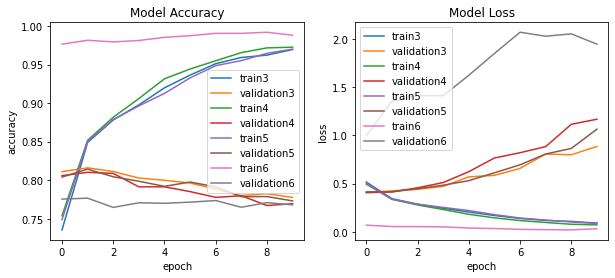

In [ ]:
#Plotting Accuracy and Loss for LSTM with different activation functions in hidden layer
def plot_training_hist(stat3, stat4, stat5, stat6):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(stat3.history['accuracy'])
    ax[0].plot(stat3.history['val_accuracy'])
    ax[0].plot(stat4.history['accuracy'])
    ax[0].plot(stat4.history['val_accuracy'])
    ax[0].plot(stat5.history['accuracy'])
    ax[0].plot(stat5.history['val_accuracy'])
    ax[0].plot(stat6.history['accuracy'])
    ax[0].plot(stat6.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train3', 'validation3', 'train4', 'validation4',\
                  'train5', 'validation5', 'train6', 'validation6'], loc='best')
    # second plot
    ax[1].plot(stat3.history['loss'])
    ax[1].plot(stat3.history['val_loss'])
    ax[1].plot(stat4.history['loss'])
    ax[1].plot(stat4.history['val_loss'])
    ax[1].plot(stat5.history['loss'])
    ax[1].plot(stat5.history['val_loss'])
    ax[1].plot(stat6.history['loss'])
    ax[1].plot(stat6.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train3', 'validation3', 'train4', 'validation4',\
                  'train5', 'validation5', 'train6', 'validation6'], loc='best')
    
plot_training_hist(stat3, stat4, stat5, stat6)

LeakyRelu attains the maximum accuracy at early stage. Whereas, tanh performs better than ReLu(suffers from exploding gradient) and sigmoid (suffers from vanishing gradient).